In [1]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pylab as plt
working_directory = os.getcwd()
print(working_directory)

/Users/pouyasohrab


In [2]:
path = working_directory + '/dmba/Cereals.csv'
df = pd.read_csv(path)

In [3]:
df.head(100)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


In [4]:
#1a. 
Quantitative_Numerical = ['calories', 'protein', 'cups', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']
Ordinal_Vairables = ['shelf', 'rating']
Nominal_Vairables = ['mfr', 'type', 'name']

In [5]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [6]:
#1b.
mean = df.mean()
median = df.median()
minimum = df.min()
maximum = df.max()
std_dev = df.std()

print("Mean:")
print(mean)
print("\nMedian:")
print(median)
print("\nMinimum:")
print(minimum)
print("\nMaximum:")
print(maximum)
print("\nStandard Deviation:")
print(std_dev)



#Alternative:

pd.DataFrame({'mean': df.mean(),
              'sd': df.std(),
              'min': df.min(),
              'max': df.max(),
              'median': df.median(),
})

Mean:
calories    106.883117
protein       2.545455
fat           1.012987
sodium      159.675325
fiber         2.151948
carbo        14.802632
sugars        7.026316
potass       98.666667
vitamins     28.246753
shelf         2.207792
weight        1.029610
cups          0.821039
rating       42.665705
dtype: float64

Median:
calories    110.000000
protein       3.000000
fat           1.000000
sodium      180.000000
fiber         2.000000
carbo        14.500000
sugars        7.000000
potass       90.000000
vitamins     25.000000
shelf         2.000000
weight        1.000000
cups          0.750000
rating       40.400208
dtype: float64

Minimum:
name        100%_Bran
mfr                 A
type                C
calories           50
protein             1
fat                 0
sodium              0
fiber             0.0
carbo             5.0
sugars            0.0
potass           15.0
vitamins            0
shelf               1
weight            0.5
cups             0.25
rating      18.04

/Users/pouyasohrab/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/Users/pouyasohrab/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/pouyasohrab/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/Users/pouya

,mean,sd,min,max,median
calories,106.883117,19.484119,50,160,110.000000
carbo,14.802632,3.907326,5.0,23.0,14.500000
cups,0.821039,0.232716,0.25,1.5,0.750000
fat,1.012987,1.006473,0,5,1.000000
fiber,2.151948,2.383364,0.0,14.0,2.000000
mfr,NaN,NaN,A,R,NaN
name,NaN,NaN,100%_Bran,Wheaties_Honey_Gold,NaN
potass,98.666667,70.410636,15.0,330.0,90.000000
protein,2.545455,1.094790,1,6,3.000000
rating,42.665705,14.047289,18.042851,93.704912,40.400208


<function matplotlib.pyplot.show(close=None, block=None)>

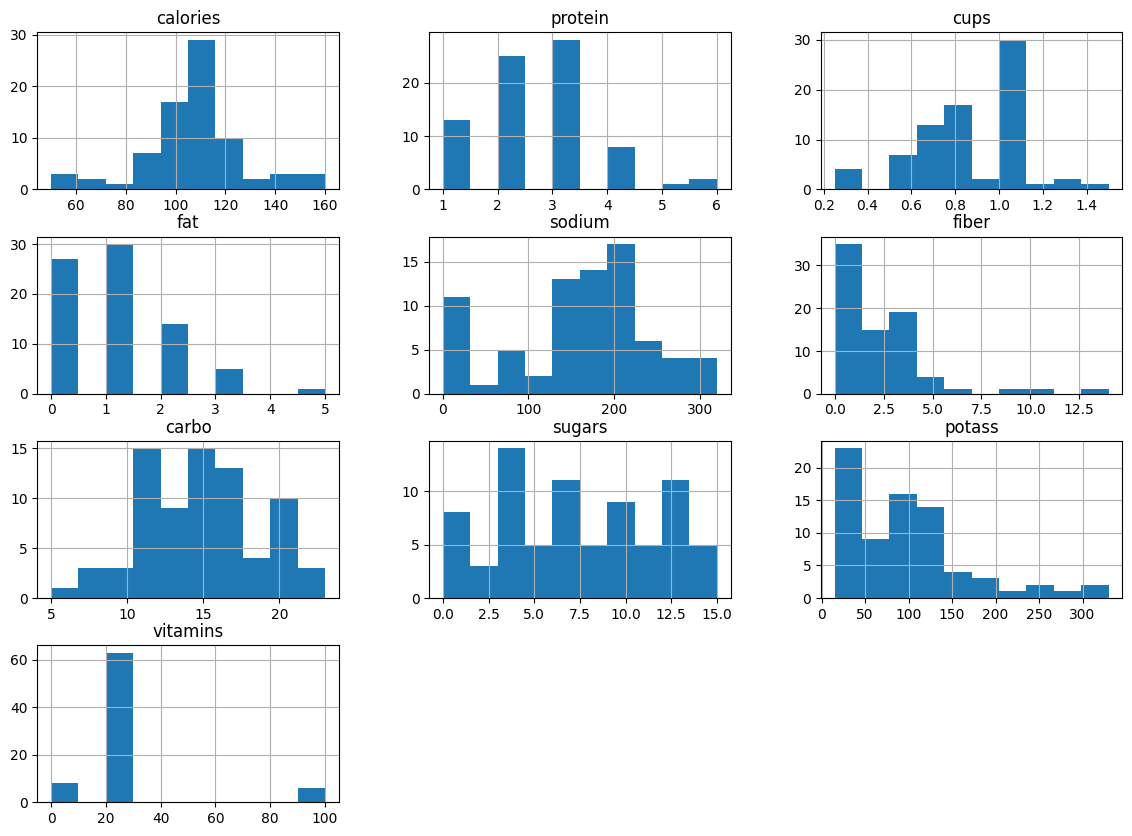

In [7]:
df[Quantitative_Numerical].hist(bins=10, figsize=(14,10))
plt.show

In [8]:
#i.
variance = df[Quantitative_Numerical].var()
variance.sort_values(ascending=False).index.tolist()

['sodium',
 'potass',
 'vitamins',
 'calories',
 'sugars',
 'carbo',
 'fiber',
 'protein',
 'fat',
 'cups']

In [9]:
#ii. 
print ('Potassium, Fiber, Fat, Vitamins')

Potassium, Fiber, Fat, Vitamins


In [10]:
#iii. 
print('Yes, there a several outliers it seems. Such as in vitamins there is an extreme outlier of 100g when the average is 28.2g. Fiber at 14g.')

Yes, there a several outliers it seems. Such as in vitamins there is an extreme outlier of 100g when the average is 28.2g. Fiber at 14g.


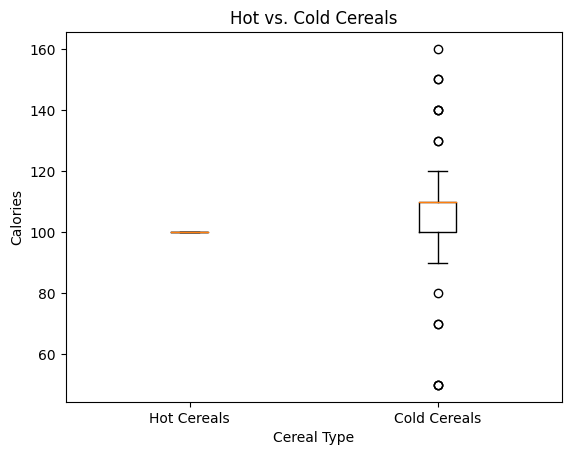

In [11]:
#1d
hot_cereals = df[df['type'] == 'H']['calories']
cold_cereals = df[df['type'] == 'C']['calories']

plt.boxplot([hot_cereals, cold_cereals], labels=['Hot Cereals', 'Cold Cereals'])
plt.xlabel('Cereal Type')
plt.ylabel('Calories')
plt.title('Hot vs. Cold Cereals')
plt.show()

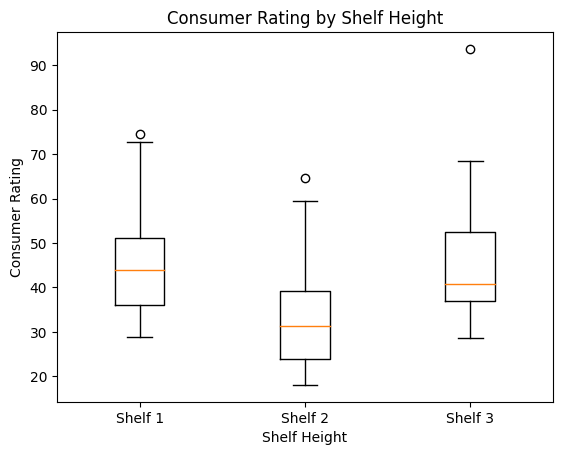

In [12]:
#1e
shelf_1 = df[df['shelf'] == 1]['rating']
shelf_2 = df[df['shelf'] == 2]['rating']
shelf_3 = df[df['shelf'] == 3]['rating']

plt.boxplot([shelf_1, shelf_2, shelf_3], labels=['Shelf 1', 'Shelf 2', 'Shelf 3'])
plt.xlabel('Shelf Height')
plt.ylabel('Consumer Rating')
plt.title('Consumer Rating by Shelf Height')
plt.show()

In [13]:
print('it appears that the differing shelf heights plays a slight factor according to the boxplots. The distribution in ratings and non-overlapping indicates that these three shelf heights do play a role in consumer ratings. However, shelf 1 and 3 have more similarity in their distributions so they could be grouped together.')

it appears that the differing shelf heights plays a slight factor according to the boxplots. The distribution in ratings and non-overlapping indicates that these three shelf heights do play a role in consumer ratings. However, shelf 1 and 3 have more similarity in their distributions so they could be grouped together.


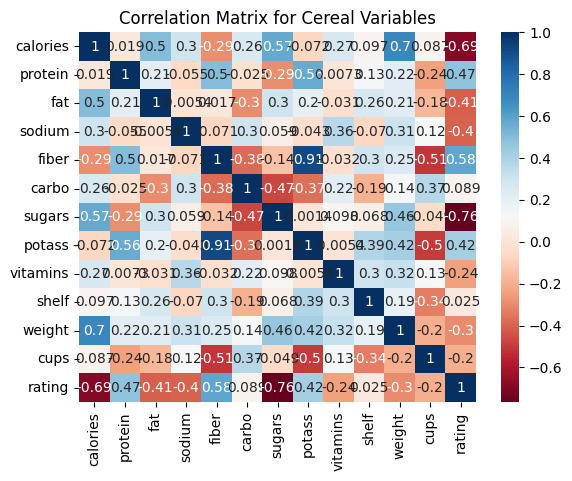

In [14]:
#1f
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="RdBu")
plt.title("Correlation Matrix for Cereal Variables")
plt.show()

In [15]:
#i. 
print('Fiber and Potassium is the most strongly correlated variables at .91')

Fiber and Potassium is the most strongly correlated variables at .91


In [16]:
#ii. 
print('We can reduce the number of variables based on these correelations by locating the highly correlated variables and consider removing one of them from the analysis. If two variables are strongly correlated, they may provide redundant information. By keeping both variables we are not adding much value to the analysis. For example, we can reduce dimensions by conducting PCA to see the amount of variance captured by Potassium and Fiber.')

We can reduce the number of variables based on these correelations by locating the highly correlated variables and consider removing one of them from the analysis. If two variables are strongly correlated, they may provide redundant information. By keeping both variables we are not adding much value to the analysis. For example, we can reduce dimensions by conducting PCA to see the amount of variance captured by Potassium and Fiber.


In [17]:
#iii. 
print('Normalization would be putting all the variables at the same scale which is helpful in comparing the varying strengths of corerelations between variables. Scaling helps prevent a variable from dominating the others due to their larger unit scale(measurement).')

Normalization would be putting all the variables at the same scale which is helpful in comparing the varying strengths of corerelations between variables. Scaling helps prevent a variable from dominating the others due to their larger unit scale(measurement).


In [18]:
#1g. 
print('The amount of sodium is dominating PC1. Furthermore, PC1 is capturing the amount of sodium in a cereal.')

The amount of sodium is dominating PC1. Furthermore, PC1 is capturing the amount of sodium in a cereal.


In [19]:
#2
path = working_directory + '/dmba/Universities.csv'
df2 = pd.read_csv(path)

In [20]:
df2.head()

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
3,University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
4,Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0


In [21]:
df2.dtypes

College Name                 object
State                        object
Public (1)/ Private (2)       int64
# appli. rec'd              float64
# appl. accepted            float64
# new stud. enrolled        float64
% new stud. from top 10%    float64
% new stud. from top 25%    float64
# FT undergrad              float64
# PT undergrad              float64
in-state tuition            float64
out-of-state tuition        float64
room                        float64
board                       float64
add. fees                   float64
estim. book costs           float64
estim. personal $           float64
% fac. w/PHD                float64
stud./fac. ratio            float64
Graduation rate             float64
dtype: object

In [22]:
#2a.
df2 = df2.drop(columns=df2.select_dtypes(exclude='number').columns)
df2 = df2.dropna()
df2.head()

,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
2,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
9,2,805.0,588.0,287.0,67.0,88.0,1376.0,207.0,11660.0,11660.0,2050.0,2430.0,120.0,400.0,900.0,74.0,14.0,72.0
11,2,608.0,520.0,127.0,26.0,47.0,538.0,126.0,8080.0,8080.0,1380.0,2540.0,100.0,500.0,1100.0,63.0,11.4,44.0
21,2,4414.0,1500.0,335.0,30.0,60.0,908.0,119.0,5666.0,5666.0,1424.0,1540.0,418.0,1000.0,1400.0,56.0,15.5,46.0


In [23]:
#2b.
df2_norm = (df2 - df2.mean()) / df2.std()

pcs = PCA()
pcs.fit(df2_norm)
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
Standard deviation,2.3648,2.1884,1.1102,1.0328,0.9908,0.8738,0.8347,0.7728,0.7339,0.6627,0.6299,0.5847,0.4585,0.4377,0.3005,0.189,0.1472,0.1198
Proportion of variance,0.3107,0.2661,0.0685,0.0593,0.0545,0.0424,0.0387,0.0332,0.0299,0.0244,0.0220,0.0190,0.0117,0.0106,0.0050,0.002,0.0012,0.0008
Cumulative proportion,0.3107,0.5767,0.6452,0.7045,0.7590,0.8014,0.8401,0.8733,0.9032,0.9276,0.9497,0.9687,0.9804,0.9910,0.9960,0.998,0.9992,1.0000


In [24]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns, 
                                index=df2_norm.columns)
pcsComponents_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
Public (1)/ Private (2),-0.316591,-0.147475,0.171296,-0.032228,-0.198917,0.068672,-0.326453,-0.009856,0.288421,0.038338,0.098710,-0.377790,0.614319,-0.106116,0.085160,0.064521,0.070937,0.233380
# appli. rec'd,0.088247,0.405724,0.001790,0.063741,-0.071633,0.141104,-0.262195,-0.087059,-0.051572,-0.095620,-0.079245,0.003095,0.050077,0.603999,0.183468,0.473005,-0.275783,0.057468
# appl. accepted,0.139203,0.393314,0.014698,0.104870,-0.152524,0.143107,-0.265926,-0.074826,-0.045832,0.029327,-0.161740,-0.083361,0.082741,0.237648,-0.219263,-0.600118,0.417811,-0.111705
# new stud. enrolled,0.190780,0.381118,0.005916,-0.042852,-0.122273,0.071940,-0.138490,-0.057592,0.076061,0.010987,-0.078474,-0.001444,-0.009226,-0.492599,0.087155,-0.281917,-0.641231,0.144234
% new stud. from top 10%,-0.269376,0.239991,-0.139189,-0.366049,0.180971,-0.007442,0.073259,-0.115499,0.052831,-0.320865,0.219093,-0.005500,-0.090757,0.013378,0.644727,-0.222807,0.193283,-0.009703
% new stud. from top 25%,-0.248772,0.255805,-0.157072,-0.380724,0.170675,0.087854,0.107385,-0.044034,0.051140,-0.301988,0.253868,-0.015737,0.102551,0.018204,-0.681311,0.081031,-0.112153,0.007046
# FT undergrad,0.209688,0.371112,0.035582,-0.065777,-0.122824,0.051213,-0.060685,-0.043205,0.027344,-0.012803,-0.063843,0.023005,-0.031042,-0.513270,0.006399,0.518873,0.481952,-0.134096
# PT undergrad,0.196632,0.205937,0.299609,0.047936,-0.295684,-0.231859,0.406218,-0.139696,0.372555,0.234578,0.524738,-0.009518,-0.027148,0.172417,-0.005215,-0.035096,-0.000508,-0.012576
in-state tuition,-0.396579,0.027634,0.091330,0.036630,-0.164870,0.003488,-0.108216,0.012383,0.052034,0.099554,-0.028530,-0.339811,-0.272412,-0.032964,-0.002043,0.035370,-0.190567,-0.742597
out-of-state tuition,-0.371248,0.131736,0.044006,0.075838,-0.134095,-0.051773,-0.023503,-0.007819,-0.015213,0.143443,-0.098258,-0.267042,-0.593178,-0.005083,-0.102874,0.043170,0.112091,0.580678


In [25]:
#2b. 
print ('The data should be normalized in order to conduct a principal component analysis (PCA). By normalizing the data, all the variables will be on the same scale and prevent any one variable domninating the rest due to their unit size which is an issue we can see with our data here with the university data (i.e. we have dummy variables such as private or public')
print('The Pca provides information such as the explained variance and contribution of each variable which can be utilized o idenify key components. Key components are variables that arer able to capture a large variation in the data to obtain insight from. We can see that 10 components captures 92% of the total variance. So 10 components is more than sufficient in further modeling.')

The data should be normalized in order to conduct a principal component analysis (PCA). By normalizing the data, all the variables will be on the same scale and prevent any one variable domninating the rest due to their unit size which is an issue we can see with our data here with the university data (i.e. we have dummy variables such as private or public
The Pca provides information such as the explained variance and contribution of each variable which can be utilized o idenify key components. Key components are variables that arer able to capture a large variation in the data to obtain insight from. We can see that 10 components captures 92% of the total variance. So 10 components is more than sufficient in further modeling.


In [26]:
#3.
path = working_directory + '/dmba/ToyotaCorolla.csv'
df3 = pd.read_csv(path)

In [27]:
df3.head(100)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,TOYOTA Corolla 2.0 D4D Linea Sol 3 Doors 2/3-D...,19950,17,4,2003,30351,Diesel,90,1,...,1,1,0,0,0,0,0,0,0,0
96,97,TOYOTA Corolla 1.4 16V VVT I 3DR TERRA COMFORT...,15950,19,2,2003,29435,Petrol,97,1,...,1,1,0,0,1,1,0,0,0,0
97,98,TOYOTA Corolla 1.4 16V VVT I 3DR TERRA COMFORT...,15950,19,2,2003,25948,Petrol,97,1,...,1,1,0,0,1,1,0,0,0,0
98,99,TOYOTA Corolla 1.6 16V VVT I 3DR SOL 2/3-Doors,18750,11,10,2003,24500,Petrol,110,1,...,1,1,0,1,1,1,1,0,0,0


In [28]:
df3.dtypes

Id                    int64
Model                object
Price                 int64
Age_08_04             int64
Mfg_Month             int64
Mfg_Year              int64
KM                    int64
Fuel_Type            object
HP                    int64
Met_Color             int64
Color                object
Automatic             int64
CC                    int64
Doors                 int64
Cylinders             int64
Gears                 int64
Quarterly_Tax         int64
Weight                int64
Mfr_Guarantee         int64
BOVAG_Guarantee       int64
Guarantee_Period      int64
ABS                   int64
Airbag_1              int64
Airbag_2              int64
Airco                 int64
Automatic_airco       int64
Boardcomputer         int64
CD_Player             int64
Central_Lock          int64
Powered_Windows       int64
Power_Steering        int64
Radio                 int64
Mistlamps             int64
Sport_Model           int64
Backseat_Divider      int64
Metallic_Rim        

In [29]:
#3a. 
print('Categorial Variables: Fuel_Type, Color')

Categorial Variables: Fuel_Type, Color


In [30]:
#3b. 
print('The relationship between a categorical variables and the series of a binary dummy variables derived from it is that each dummy variable represents a category of the categorical variable. This means when the dummy variable is 1 then the observation is belonging to that category. If it is not, the value of the dummy variable will be 0. Thereby, representing categorical data in a format which can be digested by data learning analysis and algorithms.')

The relationship between a categorical variables and the series of a binary dummy variables derived from it is that each dummy variable represents a category of the categorical variable. This means when the dummy variable is 1 then the observation is belonging to that category. If it is not, the value of the dummy variable will be 0. Thereby, representing categorical data in a format which can be digested by data learning analysis and algorithms.


In [31]:
#3c.
print('The number of dummy binary variables required to capture the information in a categorical variable with N categories is typically equivalent to N-1 dummy variables. This is because if we have 10 categorical variables and 9 dummy variables which are all set to the value 0, we can infer that the 10th categorical variable not represented is being observed since the other 9 are not. By having N-1 dummy variables we prevent multicollinearity in our models.')

The number of dummy binary variables required to capture the information in a categorical variable with N categories is typically equivalent to N-1 dummy variables. This is because if we have 10 categorical variables and 9 dummy variables which are all set to the value 0, we can infer that the 10th categorical variable not represented is being observed since the other 9 are not. By having N-1 dummy variables we prevent multicollinearity in our models.


In [32]:
#3d.
cat_vars = ['Fuel_Type', 'Color']
df3_dummys = pd.get_dummies(df3, columns = cat_vars, drop_first = True)

#Alternative:
# df3_dummys2 = pd.get_dummies(df3, drop_first=True)

In [33]:
df3_dummys.dtypes

Id                    int64
Model                object
Price                 int64
Age_08_04             int64
Mfg_Month             int64
Mfg_Year              int64
KM                    int64
HP                    int64
Met_Color             int64
Automatic             int64
CC                    int64
Doors                 int64
Cylinders             int64
Gears                 int64
Quarterly_Tax         int64
Weight                int64
Mfr_Guarantee         int64
BOVAG_Guarantee       int64
Guarantee_Period      int64
ABS                   int64
Airbag_1              int64
Airbag_2              int64
Airco                 int64
Automatic_airco       int64
Boardcomputer         int64
CD_Player             int64
Central_Lock          int64
Powered_Windows       int64
Power_Steering        int64
Radio                 int64
Mistlamps             int64
Sport_Model           int64
Backseat_Divider      int64
Metallic_Rim          int64
Radio_cassette        int64
Parking_Assistant   

In [34]:
#3d.
record = df3_dummys.iloc[1]
print(record)

Id                                                               2
Model                TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors
Price                                                        13750
Age_08_04                                                       23
Mfg_Month                                                       10
Mfg_Year                                                      2002
KM                                                           72937
HP                                                              90
Met_Color                                                        1
Automatic                                                        0
CC                                                            2000
Doors                                                            3
Cylinders                                                        4
Gears                                                            5
Quarterly_Tax                                                 

In [35]:
#3d. 
print('The values derived from the binary dummmy variables will be tied to whether the dummy variable is observed (value=1) or is not observed (value=0).')
print('For instance, record ID 2 dummy variables for color of vehicle has 0 for every color except "Color_Silver". Thereby, meaning that the Color_Silver is being observed and the color of the vehicle is Silver (the other colors are not observed)')
print('In addition, the Fuel Type Dummy Variable for Diesel has a 1 and a 0 for Petrol. Thereby, meaning that this vehicle is a Silver Diesel Vehicle')

The values derived from the binary dummmy variables will be tied to whether the dummy variable is observed (value=1) or is not observed (value=0).
For instance, record ID 2 dummy variables for color of vehicle has 0 for every color except "Color_Silver". Thereby, meaning that the Color_Silver is being observed and the color of the vehicle is Silver (the other colors are not observed)
In addition, the Fuel Type Dummy Variable for Diesel has a 1 and a 0 for Petrol. Thereby, meaning that this vehicle is a Silver Diesel Vehicle


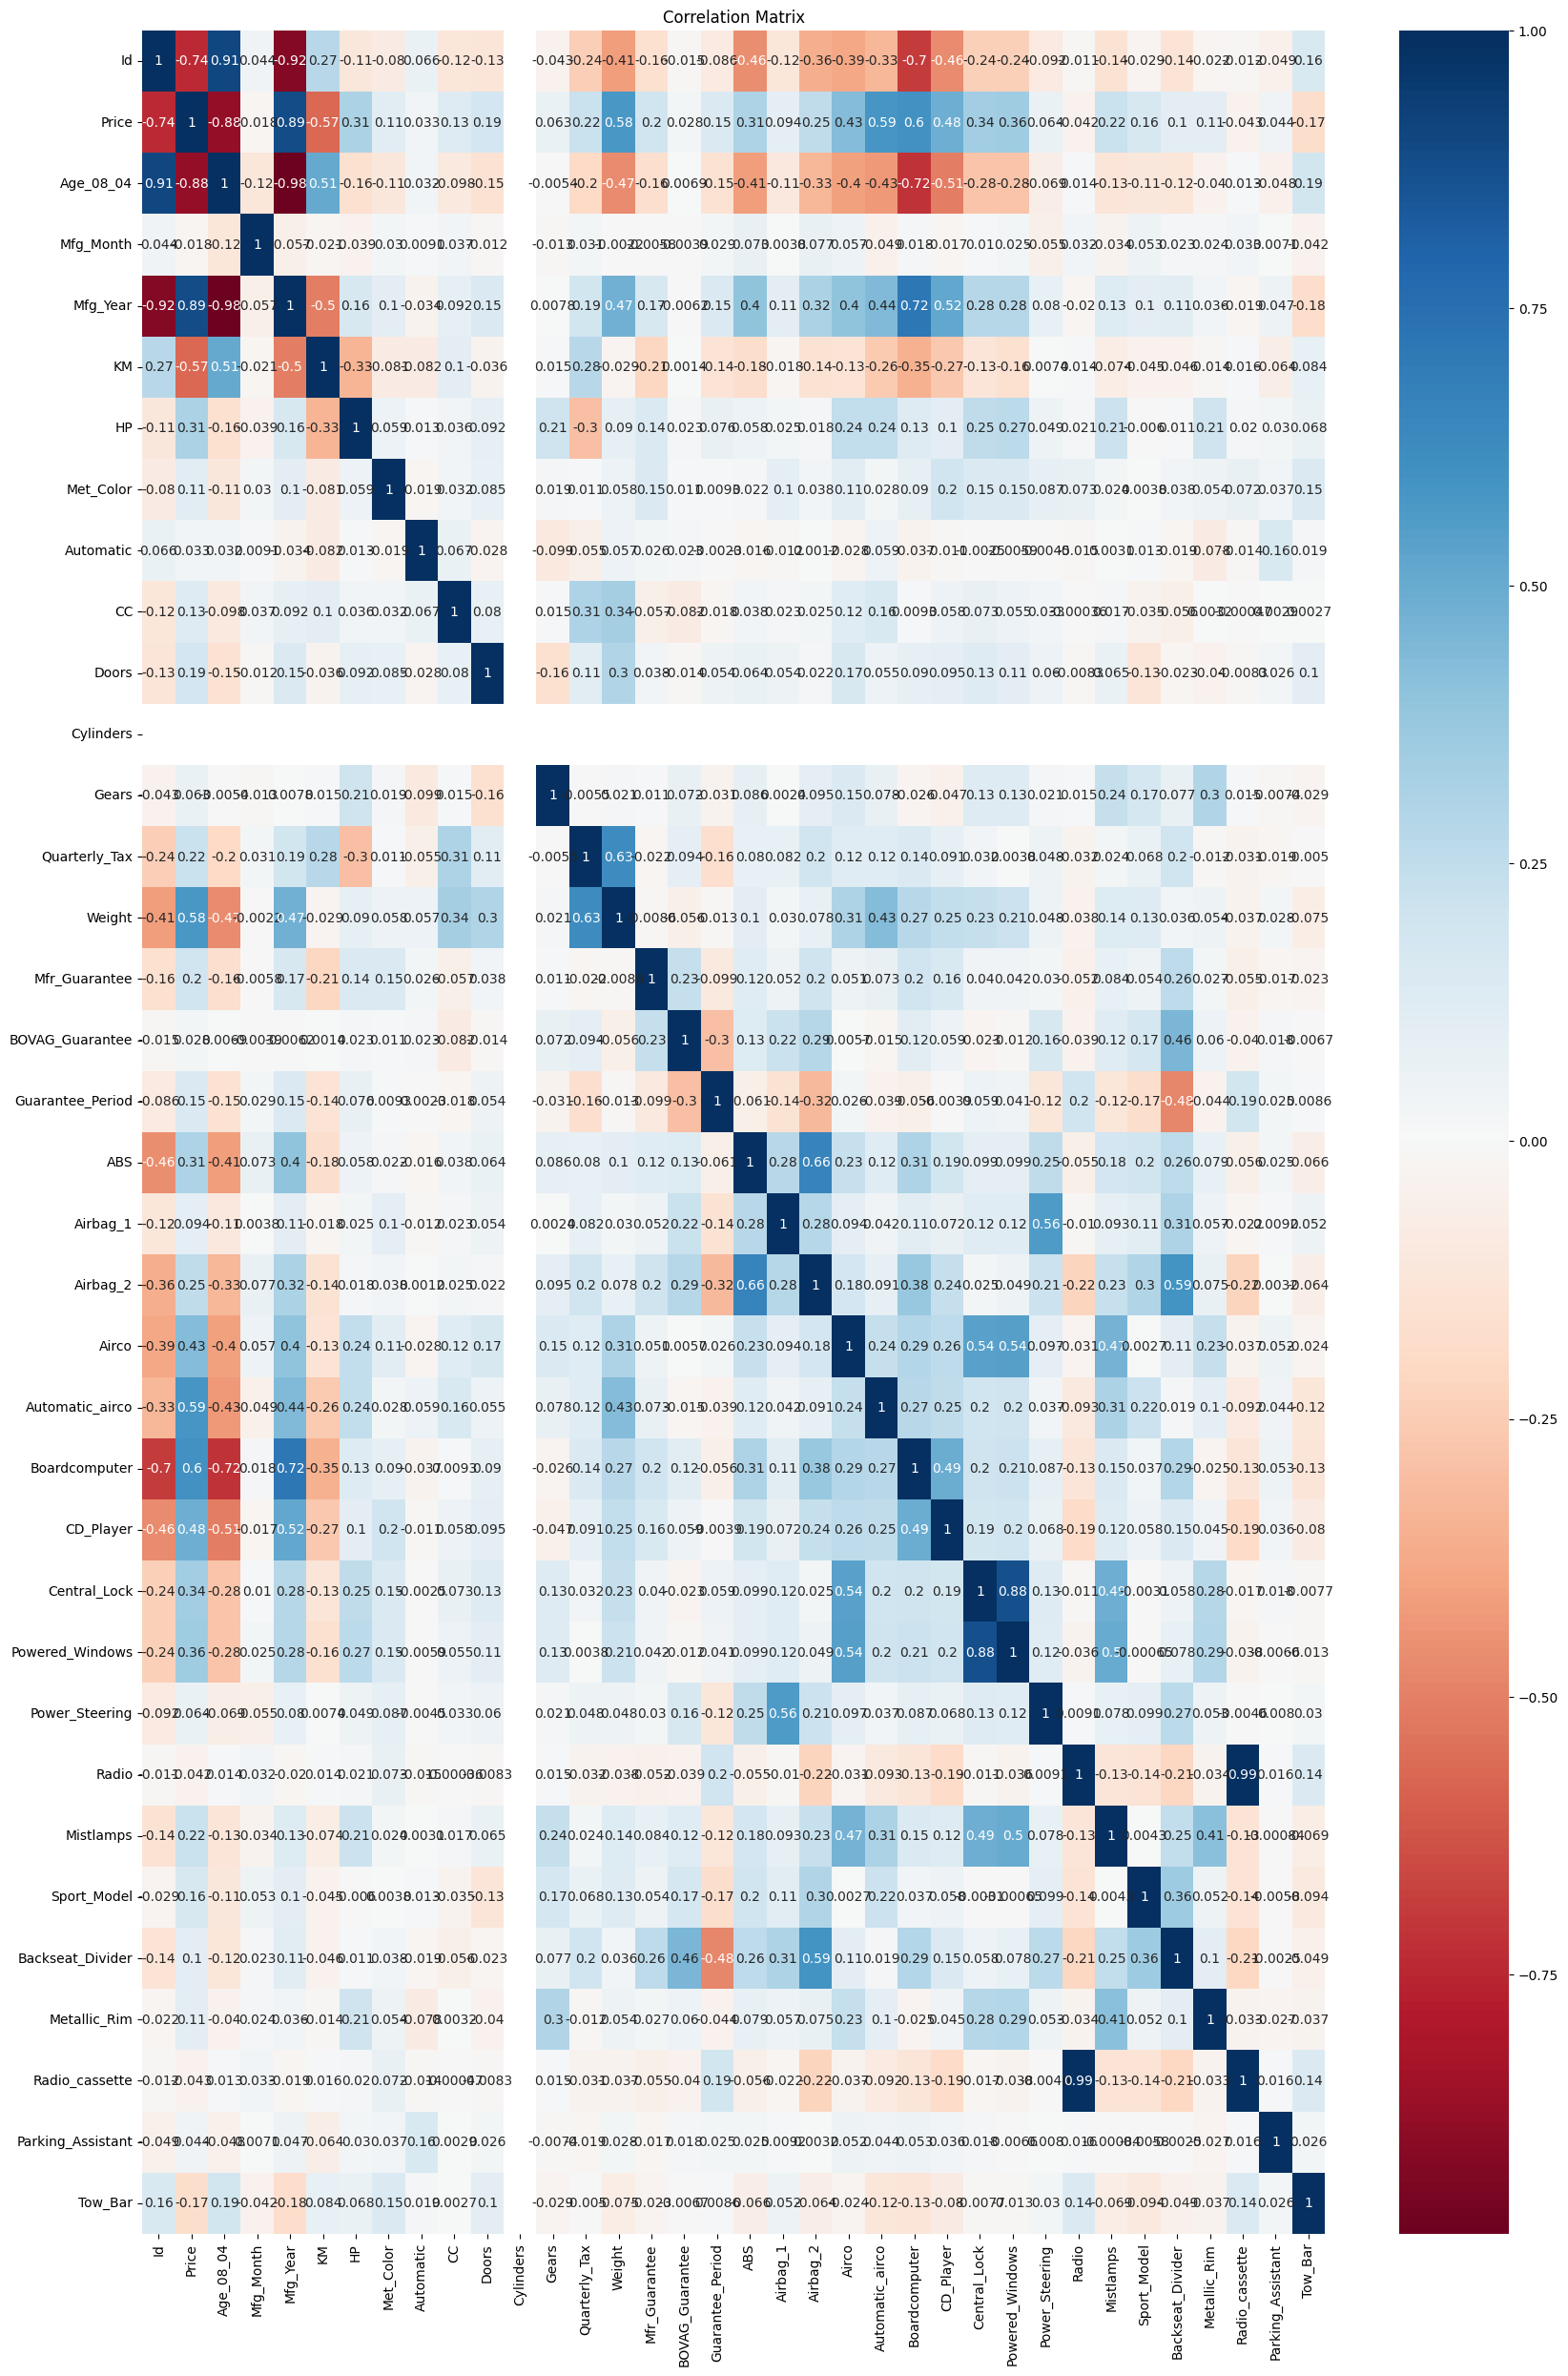

In [36]:
#3e. 

corr_matrix = df3.corr()


fig, ax = plt.subplots()
fig.set_size_inches(20, 30)
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', center=0,
ax=ax)


plt.title('Correlation Matrix')


plt.show()

In [37]:
#3e. 
print('The heatmap shows a strong positive correlation between "Price" and "Mfg_Year". Meanwhile, there is a strong negative correlation between "Price" and "Age_08_04" (Age)')

The heatmap shows a strong positive correlation between "Price" and "Mfg_Year". Meanwhile, there is a strong negative correlation between "Price" and "Age_08_04" (Age)
